In [1]:
import ipywidgets as widgets
from ipywidgets import link

from sidepanel import SidePanel

import regulus
from ipyregulus import TreeView, DetailsView

In [2]:
gauss = regulus.load('gauss4')

In [3]:
s = 0
m = 0
for node in gauss.tree:
    l = len(node.data.extrema)
    m = max(m,l)
    s += l
s, m

(425, 8)

#### Create TreeView and DetailsView in to separate side panels

In [4]:
tp = SidePanel(title='Tree')
tv = TreeView(gauss)
tp.add(tv)

In [5]:
dp = SidePanel(title='Details')
details = DetailsView(data=gauss)
dp.add(details)

#### Link the two views and select nodes 

In [6]:
link((tv.view, 'details'), (details, 'show'));
link((tv.view, 'highlight'), (details, 'highlight'));

In [7]:
tree = gauss.tree
part = tree.partition(180)

In [8]:
c = tree.attr['inverse_regression'][part]

In [9]:
c2 = c[1]

In [11]:
len(c2['y'])

40

In [122]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()

[-1, 1, 0, 1]

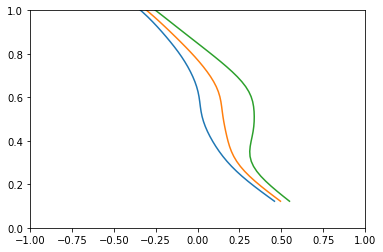

In [22]:
y = c2['y']
x = c2['x']
sigma = c2['std']/2
scale = 2.5
ic = x+scale*sigma
plt.plot(x,y, x+sigma, y, ic, y)
plt.axis([-1, 1, 0, 1])

In [23]:
w = ic - x

In [25]:
area = w.sum()

In [27]:
wn = w/area

In [60]:
r = np.arange(len(y))
p = stats.rv_discrete(name='wp', values=(r, wn))

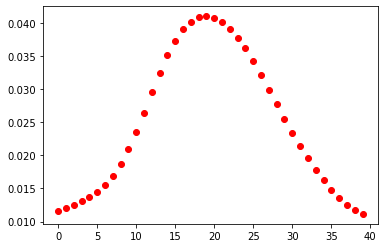

In [61]:
fig, ax = plt.subplots(1, 1)
ax.plot(r, p.pmf(r), 'ro', mec='r')
# ax.vlines(r, 0, p.pmf(r), colors='r', lw=1)
plt.show()

In [123]:
n = 20
sidx= p.rvs(size=n)

In [124]:
sx = x[sidx]+scale*sigma[sidx]*rng.uniform(-1, 1,n )

In [125]:
sy = y[sidx]

[-1, 1, 0, 1]

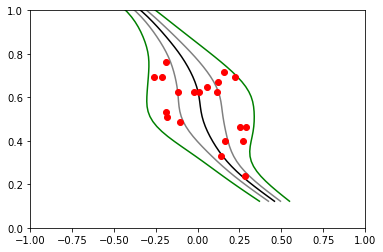

In [126]:
plt.plot(x,y,  color='black')
plt.plot(x+sigma, y, color='gray')
plt.plot(x-sigma, y, color='gray')
plt.plot(ic, y, color='green')
plt.plot(x-scale*sigma, y, color='green')
plt.plot(sx, sy, 'ro')
plt.axis([-1, 1, 0, 1])